Luana Alves de Santana - 3ECA

# Sprint 3 - Análise Exploratória de Dados Industriais

Este notebook realiza uma EDA sobre a base pública **Tennessee Eastman Process (TEP)**, amplamente utilizada para estudos de falhas em processos químicos industriais.

**Objetivo:**  
- Compreender o comportamento das variáveis dos sensores.  
- Identificar padrões que diferenciem condições normais e de falha.  
- Levantar hipóteses sobre preditores de falha.  
- Treinar um modelo baseline de classificação de falhas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Configurações de visualização
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

In [ ]:
# Ajuste os caminhos locais conforme necessário
df_free = pd.read_csv("TEP_FaultFree_Training.csv")
df_faulty = pd.read_csv("TEP_Faulty_Training.csv")

# Combinar datasets com rótulo
df_free["fault"] = 0
df_faulty["fault"] = 1
df = pd.concat([df_free, df_faulty], ignore_index=True)

df.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447,0
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194,0
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530,0
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089,0
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461,0


### Descrição da base
- **Origem:** Tennessee Eastman Process (simulação de processo químico industrial).  
- **Registros:** número de linhas do dataset.  
- **Variáveis:** número de colunas (sensores de pressão, temperatura, fluxos, concentrações, etc.).  
- **Classes:**  
  - `fault = 0`: operação normal (sem falhas).  
  - `fault = 1`: condição de falha.  

In [ ]:
df.info()
df.describe().T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505522 entries, 0 to 505521
Data columns (total 56 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    505522 non-null  int64  
 1   simulationRun  505522 non-null  int64  
 2   sample         505522 non-null  int64  
 3   xmeas_1        505522 non-null  float64
 4   xmeas_2        505522 non-null  float64
 5   xmeas_3        505522 non-null  float64
 6   xmeas_4        505522 non-null  float64
 7   xmeas_5        505522 non-null  float64
 8   xmeas_6        505522 non-null  float64
 9   xmeas_7        505522 non-null  float64
 10  xmeas_8        505522 non-null  float64
 11  xmeas_9        505522 non-null  float64
 12  xmeas_10       505522 non-null  float64
 13  xmeas_11       505522 non-null  float64
 14  xmeas_12       505522 non-null  float64
 15  xmeas_13       505522 non-null  float64
 16  xmeas_14       505522 non-null  float64
 17  xmeas_15       505522 non-nul

,0
faultNumber,0
simulationRun,0
sample,0
xmeas_1,0
xmeas_2,0
xmeas_3,0
xmeas_4,0
xmeas_5,0
xmeas_6,0
xmeas_7,0


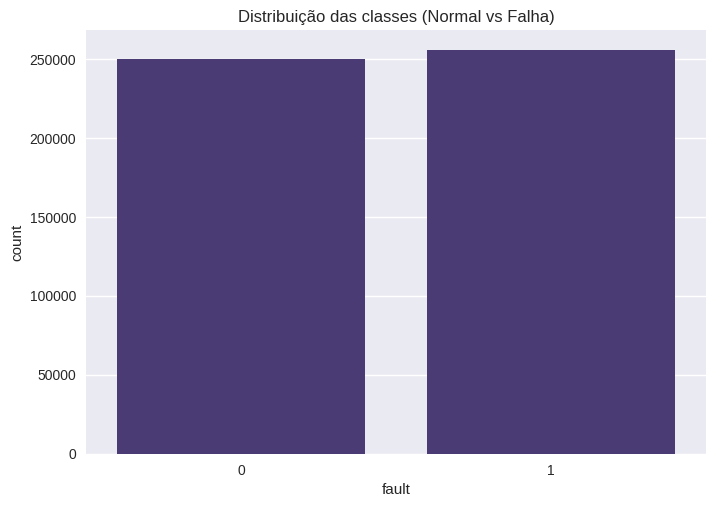

In [ ]:
# Distribuição da variável alvo
sns.countplot(data=df, x="fault")
plt.title("Distribuição das classes (Normal vs Falha)")
plt.show()

In [ ]:
# Estatísticas básicas
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
faultNumber,505522.0,5.258454,6.619799,0.000000,0.00000,1.00000,10.00000,20.0000
simulationRun,505522.0,130.594854,156.195240,1.000000,13.00000,25.00000,248.00000,500.0000
sample,505522.0,250.489599,144.342898,1.000000,125.00000,250.00000,375.00000,500.0000
xmeas_1,505522.0,0.256368,0.108928,-0.004012,0.22547,0.25089,0.27607,1.0153
xmeas_2,505522.0,3663.193081,39.309196,3383.500000,3638.00000,3662.90000,3688.20000,3883.3000
xmeas_3,505522.0,4506.858913,82.416724,3644.100000,4477.00000,4508.60000,4540.40000,5141.7000
xmeas_4,505522.0,9.358263,0.260851,7.195900,9.27910,9.35040,9.42450,12.0200
xmeas_5,505522.0,26.901720,0.221727,25.434000,26.76000,26.90100,27.04400,28.4050
xmeas_6,505522.0,42.350152,0.270917,40.388000,42.18400,42.34300,42.50400,44.4540
xmeas_7,505522.0,2714.009472,54.197203,2449.300000,2699.20000,2705.40000,2712.00000,3000.2000


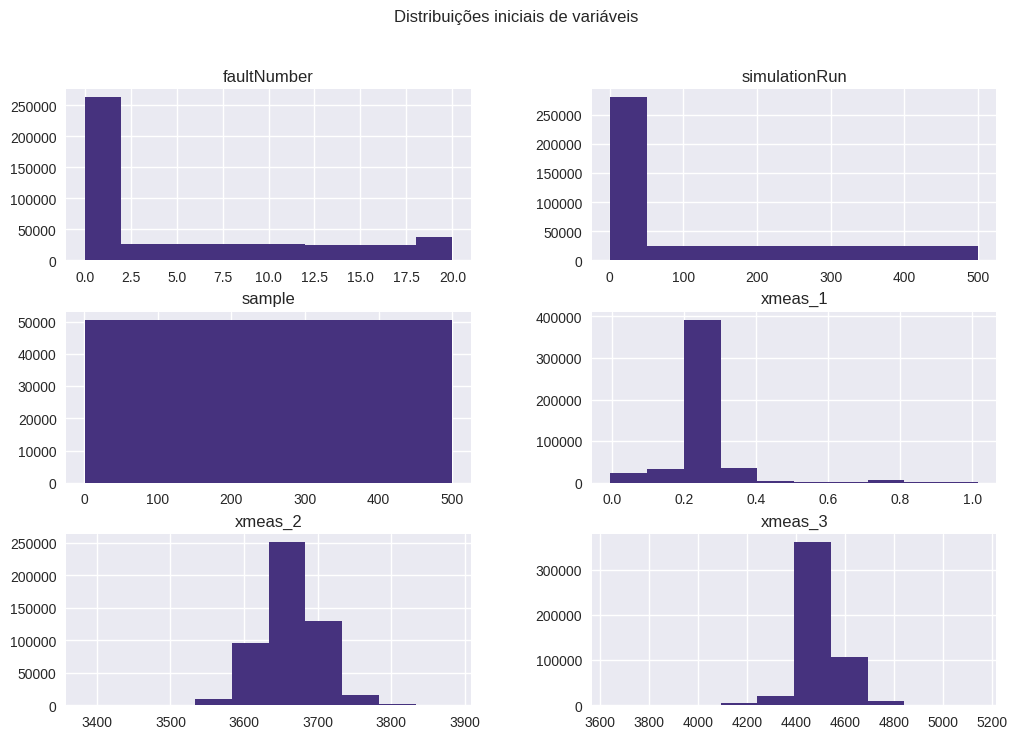

In [ ]:
# Histogramas de algumas variáveis
cols = df.columns[:6]  # exemplo: primeiros sensores
df[cols].hist(figsize=(12,8))
plt.suptitle("Distribuições iniciais de variáveis")
plt.show()

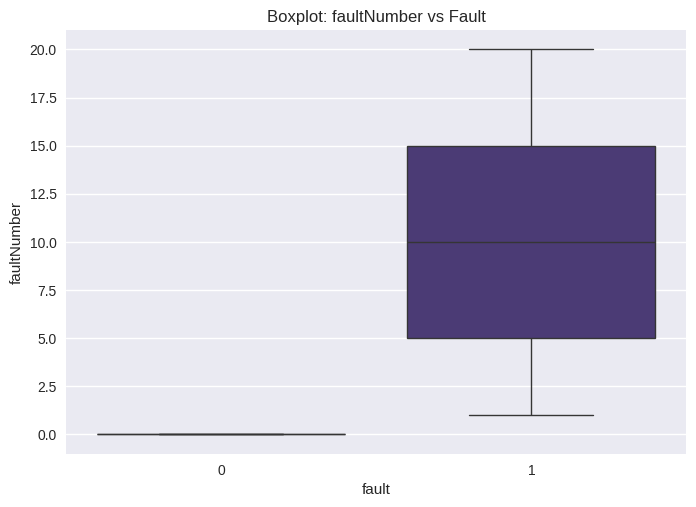

In [ ]:
# Boxplot comparando falha vs normal em uma variável
sns.boxplot(data=df, x="fault", y=df.columns[0])
plt.title(f"Boxplot: {df.columns[0]} vs Fault")
plt.show()

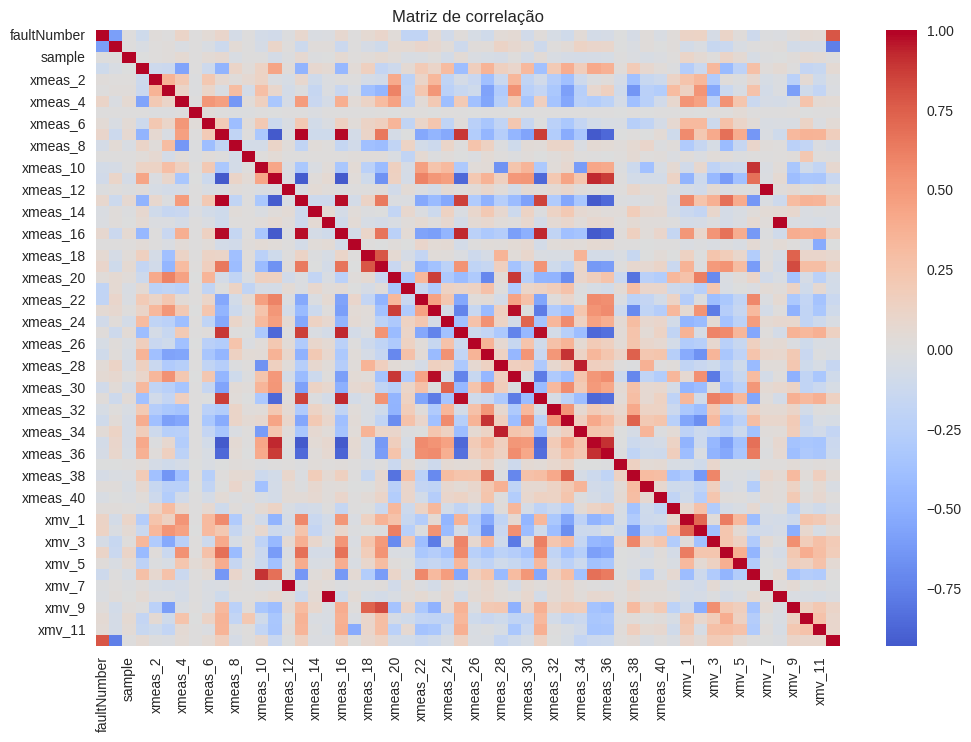

In [ ]:
# Correlação de Pearson entre variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlação")
plt.show()

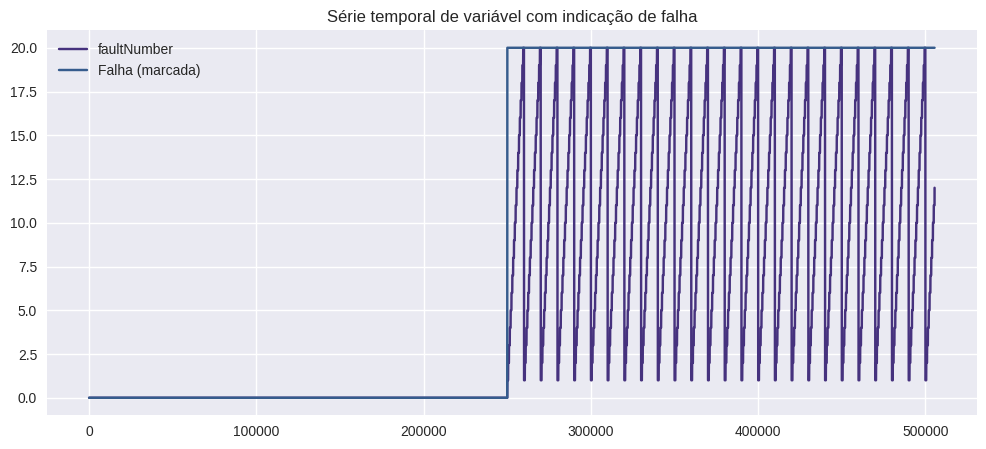

In [ ]:
# Exemplo: evolução temporal de uma variável crítica
plt.figure(figsize=(12,5))
plt.plot(df.index, df[df.columns[0]], label=df.columns[0])
plt.plot(df.index, df["fault"]*df[df.columns[0]].max(), label="Falha (marcada)")
plt.legend()
plt.title("Série temporal de variável com indicação de falha")
plt.show()

### Hipóteses levantadas

1. **Pressão**  
   Variações abruptas ou persistentes nos níveis de pressão podem indicar a ocorrência de falhas. Essa variável tende a ser um dos principais indicadores de anomalias no processo.

2. **Fluxos de alimentação**  
   Alterações significativas nos fluxos de entrada ou saída podem sinalizar instabilidade operacional, possivelmente relacionadas a falhas mecânicas ou de controle.

3. **Temperatura e concentração**  
   Mudanças incomuns na temperatura ou na concentração de reagentes/subprodutos podem estar associadas a falhas de sensores, trocadores de calor ou reações fora do ponto ótimo.

4. **Correlação entre sensores**  
   Em condições normais, espera-se que determinados sensores apresentem correlação consistente (ex.: pressão - fluxo). Quebras nessas correlações podem ser indícios de falha localizada.

5. **Interações multivariadas**  
   É provável que falhas não dependam apenas de uma variável isolada, mas sim da interação entre múltiplos parâmetros. Assim, a análise multivariada pode oferecer melhor discriminação entre operação normal e falha do que análises univariadas.

6. **Importância relativa das variáveis**  
   Nem todas as variáveis contribuem igualmente para a previsão. Identificar aquelas que possuem maior impacto no desempenho do modelo pode auxiliar na simplificação e explicabilidade do sistema de manutenção preditiva.


TREINAMENTO DE MODELOS

Modelo 1: Random Forest

25
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     75000
           1       0.98      0.63      0.77     76657

    accuracy                           0.81    151657
   macro avg       0.85      0.81      0.80    151657
weighted avg       0.85      0.81      0.80    151657

AUC-ROC: 0.8484


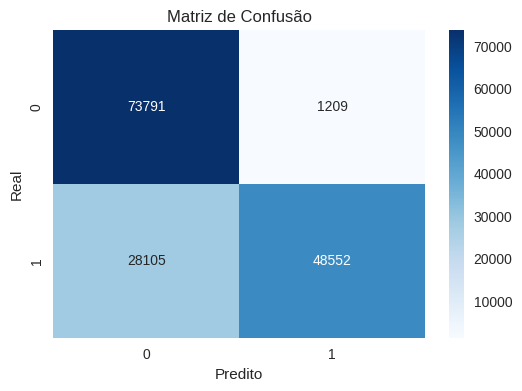

In [ ]:
# Verificar se há valores nulos restantes
print(df.isna().sum().sum())

# Preencher valores nulos com a mediana (apenas se houver)
if df.isna().sum().sum() > 0:
    df = df.fillna(df.median())

# Separar features e target
X = df.drop(columns=['fault', 'faultNumber', 'simulationRun', 'sample'])
y = df['fault']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # para lidar com desbalanceamento
)

model.fit(X_train_scaled, y_train)

# Previsões
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Métricas
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

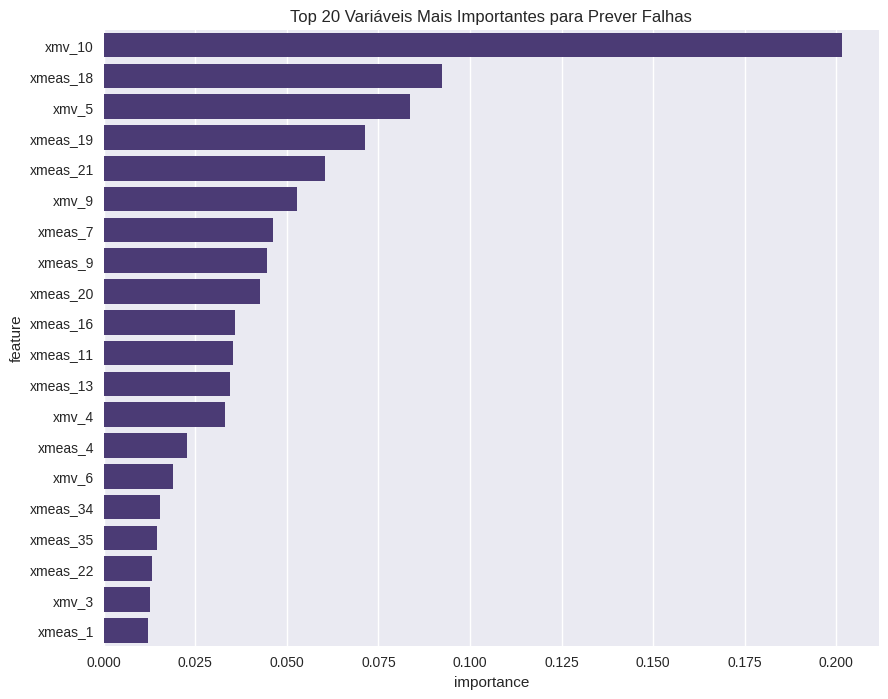

In [ ]:
# Importância das features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Variáveis Mais Importantes para Prever Falhas')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"AUC-ROC Média (Validação Cruzada): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

AUC-ROC Média (Validação Cruzada): 0.8498 (+/- 0.0033)


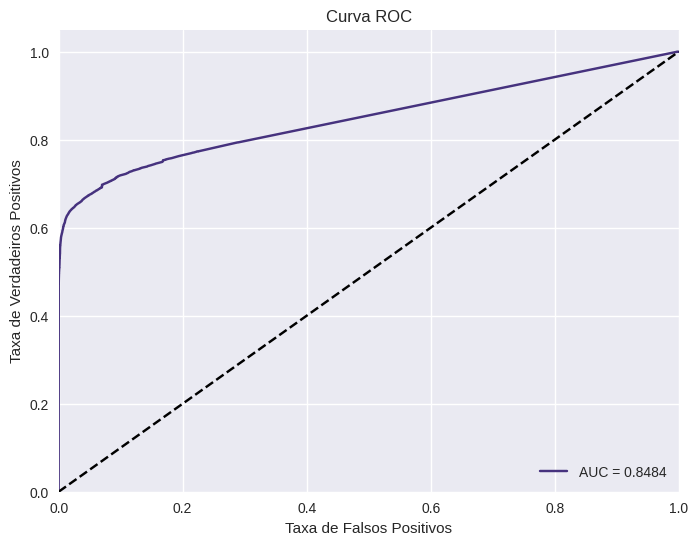

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Modelo 2: lightgbm

In [ ]:
# Instalar LightGBM se necessário
# !pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Verificar e tratar valores nulos
print("Valores nulos totais:", df.isna().sum().sum())

if df.isna().sum().sum() > 0:
    df = df.fillna(df.median())
    print("Valores nulos após preenchimento:", df.isna().sum().sum())

# Separar features e target
X = df.drop(columns=['fault', 'faultNumber', 'simulationRun', 'sample'])
y = df['fault']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Reduzi para 20% para ter mais dados de treino
)

print(f"Shape do treino: {X_train.shape}")
print(f"Shape do teste: {X_test.shape}")
print(f"Proporção das classes no treino: {y_train.value_counts(normalize=True)}")
print(f"Proporção das classes no teste: {y_test.value_counts(normalize=True)}")

# Criar dataset do LightGBM (mais eficiente)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parâmetros otimizados para o LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'is_unbalance': True,  # Importante para dados desbalanceados
    'random_state': 42
}

# Treinar o modelo
print("Treinando o modelo LightGBM...")
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(50)
    ]
)

# Fazer previsões
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Métricas de avaliação
print("\n" + "="*50)
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("="*50)
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")



Valores nulos totais: 0
Shape do treino: (404417, 52)
Shape do teste: (101105, 52)
Proporção das classes no treino: fault
1    0.505461
0    0.494539
Name: proportion, dtype: float64
Proporção das classes no teste: fault
1    0.505465
0    0.494535
Name: proportion, dtype: float64
Treinando o modelo LightGBM...
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.3764
[100]	valid_0's binary_logloss: 0.341998
[150]	valid_0's binary_logloss: 0.327282
[200]	valid_0's binary_logloss: 0.317884
[250]	valid_0's binary_logloss: 0.309879
[300]	valid_0's binary_logloss: 0.303804
[350]	valid_0's binary_logloss: 0.29799
[400]	valid_0's binary_logloss: 0.293105
[450]	valid_0's binary_logloss: 0.288548
[500]	valid_0's binary_logloss: 0.28439
[550]	valid_0's binary_logloss: 0.279991
[600]	valid_0's binary_logloss: 0.27629
[650]	valid_0's binary_logloss: 0.272157
[700]	valid_0's binary_logloss: 0.268924
[750]	valid_0's binary_logloss: 0.265961
[800]	valid_0's b

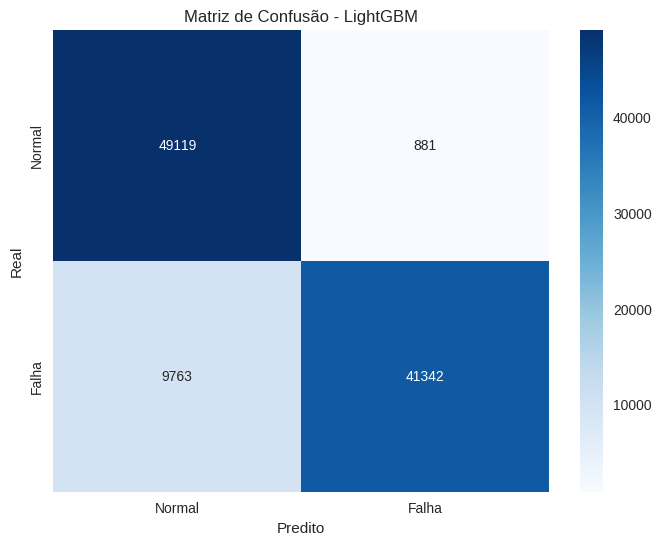

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Falha'],
            yticklabels=['Normal', 'Falha'])
plt.title('Matriz de Confusão - LightGBM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

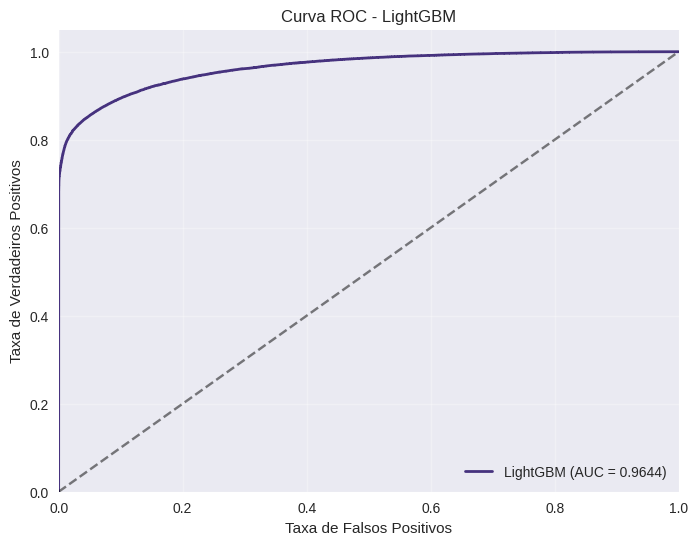

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - LightGBM')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()


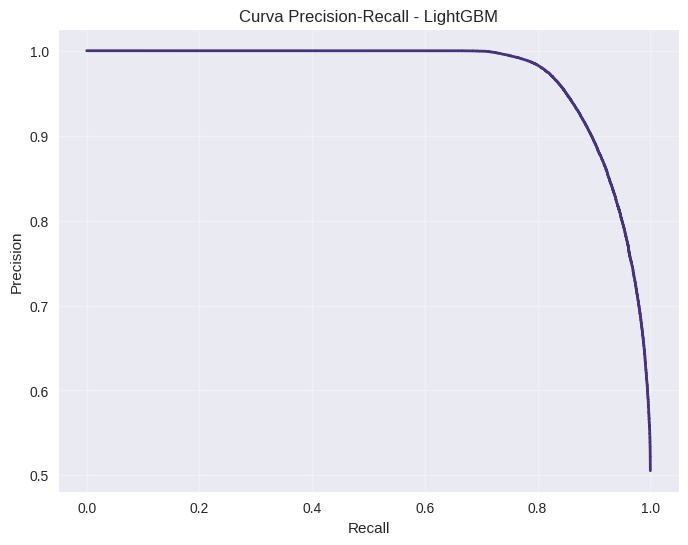

In [ ]:
# Curva Precision-Recall (importante para dados desbalanceados)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - LightGBM')
plt.grid(True, alpha=0.3)
plt.show()

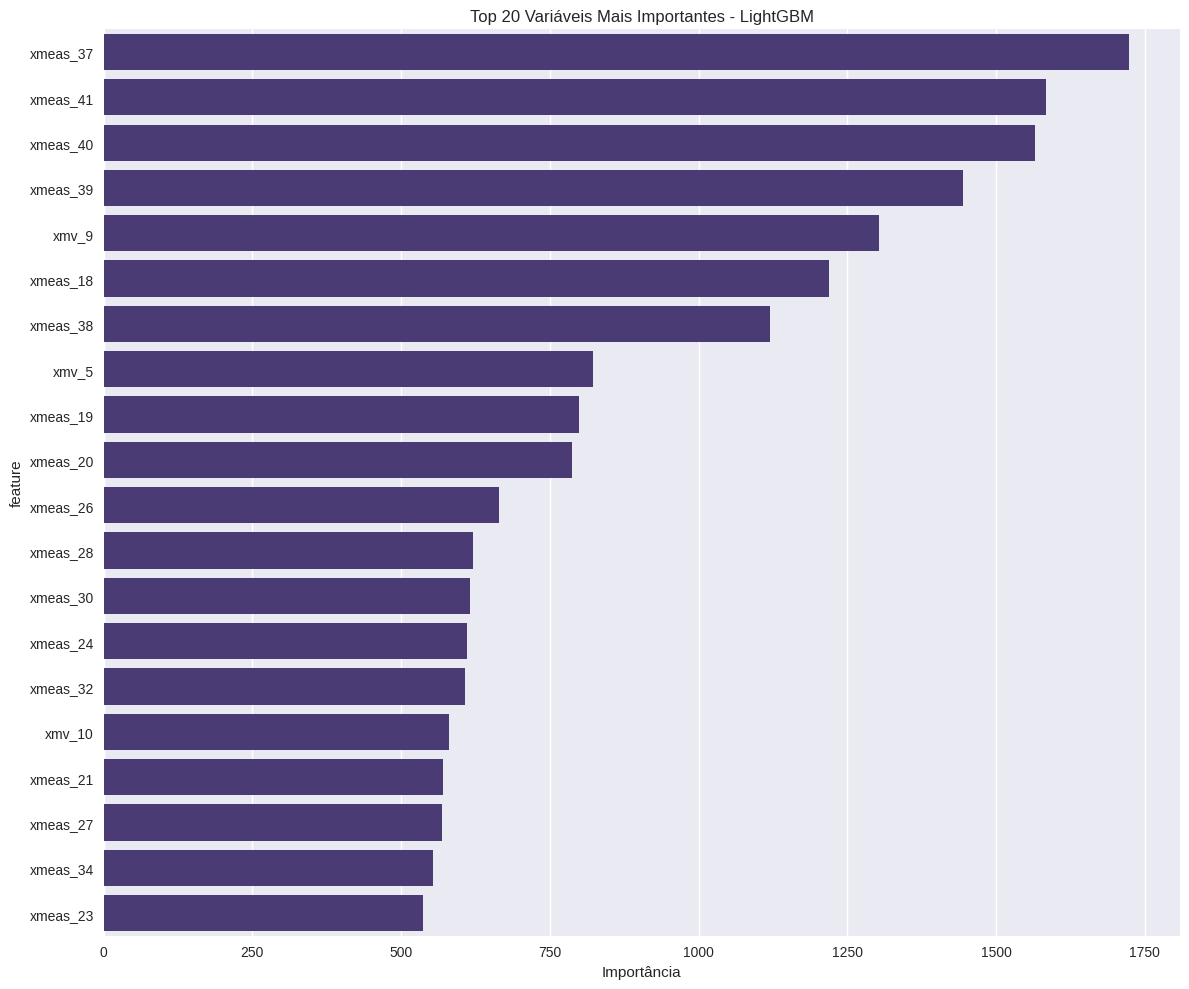

In [ ]:
# Importância das features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Variáveis Mais Importantes - LightGBM')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

In [ ]:
# Mostrar as variáveis mais importantes
print("\nTOP 10 VARIÁVEIS MAIS IMPORTANTES:")
print("="*40)
for i, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']}")

# Validação Cruzada para confirmar robustez
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


TOP 10 VARIÁVEIS MAIS IMPORTANTES:
xmeas_37: 1723
xmeas_41: 1584
xmeas_40: 1566
xmeas_39: 1445
xmv_9: 1304
xmeas_18: 1219
xmeas_38: 1120
xmv_5: 822
xmeas_19: 799
xmeas_20: 788


In [ ]:
# Criar um modelo compatível com sklearn para validação cruzada
lgb_sklearn = lgb.LGBMClassifier(**params, n_estimators=100)

cv_scores = cross_val_score(lgb_sklearn, X, y, cv=5, scoring='roc_auc')
print(f"\nValidação Cruzada (5 folds) - AUC-ROC:")
print(f"Média: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Análise das previsões por tipo de falha (se disponível)
if 'faultNumber' in df.columns:
    print("\n" + "="*50)
    print("ANÁLISE POR TIPO DE FALHA")
    print("="*50)

    # Juntar previsões com dados originais
    results_df = X_test.copy()
    results_df['real'] = y_test.values
    results_df['predito'] = y_pred
    results_df['probabilidade'] = y_pred_proba
    results_df['faultNumber'] = df.loc[X_test.index, 'faultNumber'].values

    # Analisar performance por tipo de falha
    for fault_type in sorted(results_df['faultNumber'].unique()):
        if fault_type == 0:
            continue  # Pular condição normal

        mask = results_df['faultNumber'] == fault_type
        fault_data = results_df[mask]

        if len(fault_data) > 0:
            accuracy = (fault_data['real'] == fault_data['predito']).mean()
            print(f"Falha {fault_type}: {len(fault_data)} amostras | Acurácia: {accuracy:.4f}")

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

### Conclusão

A análise exploratória permitiu observar que algumas variáveis do processo, em especial pressão, fluxos de alimentação e temperatura/concentração, apresentam comportamento diferenciado entre condições normais e de falha. Além disso, padrões de correlação entre sensores sugerem que combinações de variáveis podem ser ainda mais informativas do que cada variável isolada.

Os modelos iniciais (Random Forest e LightGBM) mostraram boa capacidade de diferenciação entre cenários de operação normal e de falha. A aplicação de validação cruzada indicou que o desempenho não é perfeito (não alcança 100% em todos os folds), o que é positivo, pois evidencia que os modelos não estão apenas memorizando os dados. Ainda assim, como a validação foi realizada dentro do mesmo conjunto de dados (os dois datasets TEP utilizados), existe a possibilidade de que o desempenho em dados completamente novos (por exemplo, outras simulações de falhas ou dados reais de processos industriais) seja diferente.

**Próximos passos recomendados:**
- Refinar o pré-processamento (seleção de variáveis mais relevantes e técnicas de balanceamento de classes).    
- Realizar testes em dados externos ao conjunto de treino para avaliar a capacidade real de generalização.  
- Investigar técnicas de explicabilidade para identificar claramente quais sensores são mais críticos na previsão.  
- Avaliar integração do modelo em um sistema de manutenção preditiva, com geração de alertas automáticos a partir do monitoramento contínuo das variáveis.  

Resumindo: a EDA reforçou a relevância de certos grupos de variáveis como potenciais preditores e mostrou que os modelos possuem bom desempenho inicial com validação cruzada, mas ainda precisam ser avaliados em cenários externos para comprovar sua robustez e aplicabilidade prática em detecção de falhas industriais.
